First create a new virtual environment to overcome packages version conflicts.

In [ ]:
# All associated config and frosen model files are in the same folder where the code existis in the external drive

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\asus\Python Data Science\Object Detection\Object_Detection\Scripts\python.exe -m pip install --upgrade pip' command.


In [6]:
!pip install --upgrade tensorflow opencv-python


     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.5 kB ? eta -:--:--
     -------------------------------------- 57.5/57.5 kB 433.3 kB/s eta 0:00:00
     ---------------------------------------- 0.0/65.5 kB ? eta -:--:--
     ------------------------- -------------- 41.0/65.5 kB 1.9 MB/s eta 0:00:01
     ------------------------- -------------- 41.0/65.5 kB 1.9 MB/s eta 0:00:01
     ------------------------- -------------- 41.0/65.5 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 65.5/65.5 kB 321.2 kB/s eta 0:00:00
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.5 MB 2.0 MB/s eta 0:00:01
     - -------------------------------------- 0.1/1.5 MB 1.1 MB/s eta 0:00:02
     - -------------------------------------- 0.1/1.5 MB 1.1 MB/s eta 0:00:02
     

  You can safely remove it manually.


   ---------------------------------- ----- 257.5/300.9 MB 1.2 MB/s eta 0:00:38
   ---------------------------------- ----- 257.6/300.9 MB 1.2 MB/s eta 0:00:38
   ---------------------------------- ----- 257.6/300.9 MB 1.2 MB/s eta 0:00:38
   ---------------------------------- ----- 257.7/300.9 MB 1.2 MB/s eta 0:00:38
   ---------------------------------- ----- 257.7/300.9 MB 1.1 MB/s eta 0:00:38
   ---------------------------------- ----- 257.8/300.9 MB 1.2 MB/s eta 0:00:38
   ---------------------------------- ----- 257.9/300.9 MB 1.2 MB/s eta 0:00:38
   ---------------------------------- ----- 258.0/300.9 MB 1.2 MB/s eta 0:00:38
   ---------------------------------- ----- 258.1/300.9 MB 1.1 MB/s eta 0:00:38
   ---------------------------------- ----- 258.1/300.9 MB 1.1 MB/s eta 0:00:38
   ---------------------------------- ----- 258.2/300.9 MB 1.1 MB/s eta 0:00:38
   ---------------------------------- ----- 258.2/300.9 MB 1.1 MB/s eta 0:00:38
   ---------------------------------- --

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\asus\Python Data Science\Object Detection\Object_Detection\Scripts\python.exe -m pip install --upgrade pip' command.


In [7]:
import cv2 # special package inside open CV 

In [8]:
cv2.__version__

'4.9.0'

In [9]:
import matplotlib.pyplot as plt

In [10]:
#mobile net is pre-trained model for image recognition and object analysis. It`s frozen model is avilable in public as a .pb 
# file. We have used that, as mentioned below. It required some additional configurations, which is provided by the pbtext file
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'

In [11]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [12]:
# class label file has been downloaded. This is used as enumerator to make the int output provided into text.
# currently, mobile net works for 80 classes. Though we add new classes for the label file, it will not work, hecnce the
# model is not trained
classLabels=[]
file_name="Labels.txt"
with open (file_name,'rt') as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')

In [13]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [14]:
# some adjustments are made to the input. Then the captured input will go through these adjustments. Becz, that1s how config
# file is organized and , once satisfying these adjusments only, the model can effectively asses the input images / videos
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000025B906B37D0>

In [15]:
img=cv2.imread('download.jpg')

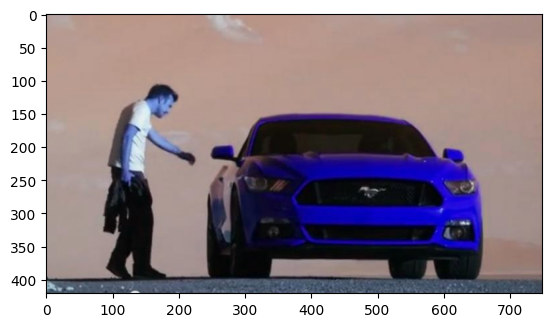

In [16]:
plt.imshow(img) # this is why we need pyplotlib

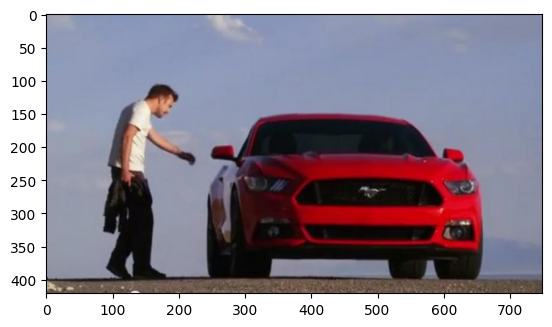

In [19]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) # some color change filter

In [20]:
ClassIndex,confidence,bbox=model.detect(img,confThreshold=0.5) # if the detection confidence is more than 50% display the o/p

In [21]:
print(ClassIndex) # numerical predications of classes. Check with the class label list, strating from 1. Then, those are 
# man and car

[3 1 1]


In [22]:
font_scale=2
font=cv2.FONT_HERSHEY_PLAIN # bounding box text
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    # configuration of bounding box and associated text
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)  

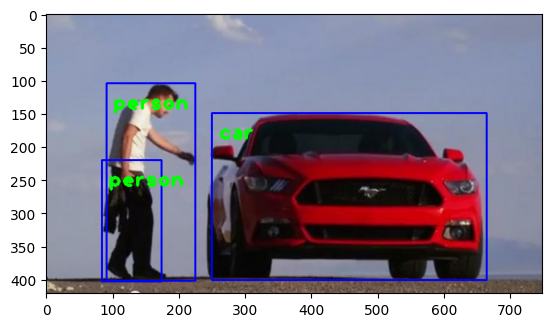

In [23]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [24]:
# same logic will work for both video and images.
# Type letter q to exist the execution on the image / video canvas

cap=cv2.VideoCapture('video.mp4') # for mp4 video feed  capture

#cap=cv2.VideoCapture(0) # for laptop or web camera capture. For external cameras, this 0 should be changed to 1.
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot Open Video / Web Cam")
    
font_scale=2
font=cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame=cap.read()
    ClassIndex,confidence,bbox=model.detect(frame,confThreshold=0.55)
    print(ClassIndex)
    if(len(ClassIndex))!=0:
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
            if(ClassInd <80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
    cv2.imshow('Capture',frame)
    if cv2.waitKey(2) & 0xFF ==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
        

()


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [ ]:
q